In [1]:
import argparse
from collections import defaultdict
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import scanpy as sp
from scipy.stats import spearmanr
from sklearn.cluster import KMeans
import seaborn as sns
from tqdm import tqdm

In [2]:
outpath = "/oak/stanford/groups/horence/JuliaO/visium_analysis/scripts/output/ising/"

In [51]:
# score = "ReadZS"
# score2 = "ReadZS_ge"

score = "SpliZ_norm"
score2 = "ge_norm"

# score = "ReadZS_norm"
# score2 = "ReadZS_ge_norm"

scores = pd.read_csv("output/make_samplesheet/scores.csv",index_col=0)
srow = scores.loc[score]
srow2 = scores.loc[score2]

# dataname = "V1_Mouse_Kidney"
dataname = "V1_Mouse_Brain_Sagittal_Anterior"
# dataname = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
# dataname = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
# dataname = "Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma"
# dataname = "Visium_FFPE_Mouse_Kidney"
# dataname = "Visium_FFPE_Human_Prostate_IF"
# dataname = "Visium_FFPE_Human_Breast_Cancer"
samples = pd.read_csv("output/make_samplesheet/spatial.csv",index_col = 0)
# samples
row = samples.loc[dataname]

# change way of getting corr depending on score

# if score == "ReadZS":
#   corr = pd.read_csv(row["pixcorr_readzs"],sep="\t")


if row[srow["valname"]].endswith(".pq"):
  spliz_df = pd.read_parquet(row[srow["valname"]])
else:
  spliz_df = pd.read_csv(row[srow["valname"]],sep="\t")
  

  
if row[srow2["valname"]].endswith(".pq"):
  spliz_df2 = pd.read_parquet(row[srow2["valname"]])
else:
  spliz_df2 = pd.read_csv(row[srow2["valname"]],sep="\t")

spliz_df["gene_cell"] = spliz_df[srow["genecol"]] + "_" + spliz_df[srow["cellid"]]
spliz_df2["gene_cell"] = spliz_df2[srow2["genecol"]] + "_" + spliz_df2[srow2["cellid"]]

# create_dict = False
# create_file = False
# if create_dict:
  
  
  
#   ens_path = "/oak/stanford/groups/horence/JuliaO/data/visium/ensembl_windows.txt"
#   ens = pd.read_csv(ens_path,sep="\t")
#   if create_file:
#     gtf_file = "/oak/stanford/groups/horence/rob/readzs_fork/gencode.vM10.annotation.gff3"
#     gtf = load_gtf(gtf_file,True)
#     gtf = gtf.drop_duplicates("gene_id")
#     ens["chrom"] = ens["gene_id"].map({k : v for k, v in zip(gtf["gene_id"],gtf["seqname"])}) 
#     ens["strand"] = ens["gene_id"].map({k : v for k, v in zip(gtf["gene_id"],gtf["strand"])}) 
#     ens["sign"] = ens["strand"].map({"+" : "plus", "-" : "minus"})
#     ens["full_window"] = ens["chrom"] + "_" + ens["window"].astype(str) + "_" + ens["sign"]
#     df = pd.read_csv("/oak/stanford/groups/horence/rob/readzs_fork/mouse_gene_name_ids.csv")
#     df["gene_id"] = df["gene_id"].str.split(".").str[0]
#   #   ens_dict = {k:v for k, v in zip(spliz_df["ensembl"],spliz_df["gene"])}
#     window_dict = {k : v for k, v in zip(ens["window"],ens["gene_id"])}
#     ens["gene_name"] = ens["gene_id"].map({k : v for k, v in zip(df["gene_id"],df["gene_name"])})
#     ens.to_csv(ens_path,sep="\t",index=False)
#   name_dict = defaultdict(lambda  : "")
#   for win, windf in tqdm(ens.dropna().drop_duplicates(["full_window","gene_name"]).groupby("full_window")):
#     name_dict[win] = ",".join(list(windf["gene_name"]))
  
# add_gene_names = False
# if add_gene_names:


#   corr["gene"] = corr["window"].map(name_dict)
#   corr.to_csv(row["pixcorr_readzs"],sep="\t",index=False)

In [52]:
# get rid of outliers
while (list(spliz_df["plot_xcoord"].sort_values().unique())[1] - list(spliz_df["plot_xcoord"].sort_values().unique())[0]) > 1000:

  spliz_df = spliz_df[spliz_df["plot_xcoord"] > list(spliz_df["plot_xcoord"].sort_values())[0]]
  
while (list(spliz_df["plot_xcoord"].sort_values().unique())[-1] - list(spliz_df["plot_xcoord"].sort_values().unique())[-2]) > 1000:

  spliz_df = spliz_df[spliz_df["plot_xcoord"] < list(spliz_df["plot_xcoord"].sort_values())[-1]]


In [53]:
# get rid of outliers
while (list(spliz_df2["plot_xcoord"].sort_values().unique())[1] - list(spliz_df2["plot_xcoord"].sort_values().unique())[0]) > 1000:

  spliz_df2 = spliz_df2[spliz_df2["plot_xcoord"] > list(spliz_df2["plot_xcoord"].sort_values())[0]]
  
while (list(spliz_df2["plot_xcoord"].sort_values().unique())[-1] - list(spliz_df2["plot_xcoord"].sort_values().unique())[-2]) > 1000:

  spliz_df2 = spliz_df2[spliz_df2["plot_xcoord"] < list(spliz_df2["plot_xcoord"].sort_values())[-1]]


In [54]:

outpath = "output/plot_val_ge/"


thresh = 5
xcol = "plot_xcoord"
ycol = "plot_ycoord"
alpha = 0.2

Image.MAX_IMAGE_PIXELS = 691964736
im = Image.open(row["image"])
graydf = spliz_df.drop_duplicates(srow["cellid"])

Myl6
(2649, 34)
(2649, 34)


/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


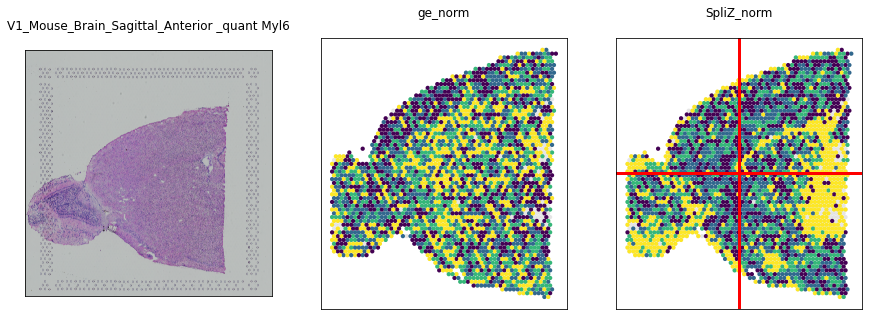

Rps24
(2690, 34)
(2690, 34)


/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


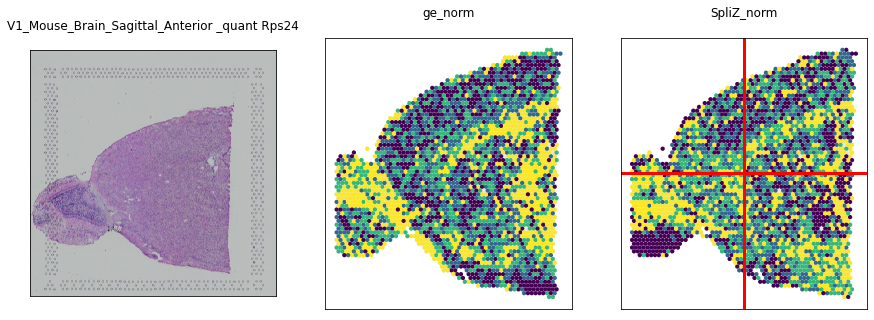

Gng13
(1871, 34)
(1871, 34)


/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


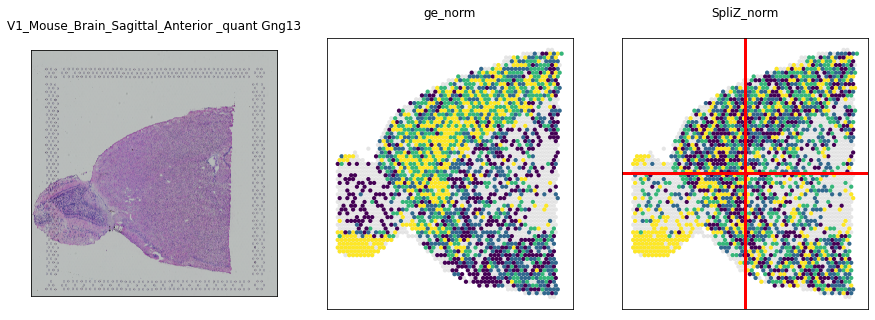

In [55]:

# grouping_level_2 = "circle"
grouping_level_2 = "quadrant"

thresh = 0
upper = 1
lower = 0
palette0 = "viridis"
palette1 = "viridis"
palette2 = "vlag"
legval = True
show_image = True
# suffs = ["","_quant"]
suffs = ["_quant"]

xhalf = (graydf["plot_xcoord"].max() - graydf["plot_xcoord"].min())/2 + graydf["plot_xcoord"].min()
yhalf = (graydf["plot_ycoord"].max() - graydf["plot_ycoord"].min())/2 + graydf["plot_ycoord"].min()
radius = ((xhalf - graydf["plot_xcoord"].min())/2 + (yhalf - graydf["plot_ycoord"].min())/2)/2

# for gene in ["Rps24","Myl6","Atp5c1","Cox6a1"]:
# for gene in ['Cox7c', 'Fxyd2', 'Myl6', 'Mrpl13', 'Mcee', 'Rps24']:
# for gene in ['Gas5', 'Gng13', 'Ptgds', 'Rps24', 'Myl6']:
for gene in ["Myl6","Rps24","Gng13"]:
# for gene in ["Myl6","Rps24","Hint2","Ptgds","Gm1673"]:
# for gene in ["Rps16","Rps24","Mrpl13","Myl6","Mcee","Hint3","Tmem205"]:
# for gene in ["chr12_11221_minus","chr6_6373_plus"]:
# for gene in list(spliz_df["window"].head(10)):

# for gene in ising[ising["perm_pvals_adj"] < 0.05].sort_values("score_cont",ascending=False).head(20)[srow["genecol"]]:
# for gene in corr[corr["pval_pixval_adj"] < 0.05][srow["genecol"]]:
# for gene in ["R"]
# for gene in ["chr10_25699_minus",'chr14_4898_plus','chr14_4899_plus','chr14_4900_plus',"chr8_852_minus","chr7_25404_minus","chr8_11013_plus","chr4_23431_minus","chr4_27692_plus","chr12_14443_minus","chr1_32888_minus"]:
# for gene in ['chr9_22437_minus','chr7_24527_plus','chr11_24001_plus','chr18_12198_plus','chr9_15012_plus','chr3_27388_plus','chr4_27692_plus','chr12_21913_plus','chr3_18123_plus','chr8_11013_plus']:
# for gene in ['chr7_4994_minus','chr18_6195_minus','chr5_22885_plus','chr4_8188_minus','chr1_12629_minus','chr1_26211_minus','chr18_7281_minus','chr10_15686_plus','chr2_31079_minus','chr5_27159_plus']:
#   for gene in spliz_df2["window"].value_counts().head(10).index:
  print(gene)
  gene_df = spliz_df[spliz_df[srow["genecol"]] == gene]
  print(gene_df.shape)
  gene_df2 = spliz_df2[spliz_df2[srow2["genecol"]] == gene]
  print(gene_df2.shape)

  if gene_df.shape[0] > thresh:
    
    gene_df[srow["col"] + "_quant"] = 1

    gene_df.loc[gene_df[srow["col"]] > gene_df[srow["col"]].quantile(.25),srow["col"] + "_quant"] = 2
    gene_df.loc[gene_df[srow["col"]] > gene_df[srow["col"]].quantile(.5),srow["col"] + "_quant"] = 3
    gene_df.loc[gene_df[srow["col"]] > gene_df[srow["col"]].quantile(.75),srow["col"] + "_quant"] = 4
    
    gene_df2[srow2["col"] + "_quant"] = 1

    gene_df2.loc[gene_df2[srow2["col"]] > gene_df2[srow2["col"]].quantile(.25),srow2["col"] + "_quant"] = 2
    gene_df2.loc[gene_df2[srow2["col"]] > gene_df2[srow2["col"]].quantile(.5),srow2["col"] + "_quant"] = 3
    gene_df2.loc[gene_df2[srow2["col"]] > gene_df2[srow2["col"]].quantile(.75),srow2["col"] + "_quant"] = 4
    
    gene_df[srow2["col"]] = gene_df["gene_cell"].map({x : y for x, y in zip(gene_df2["gene_cell"],gene_df2[srow2["col"]])})
    gene_df[srow2["col"] + "_quant"] = gene_df["gene_cell"].map({x : y for x, y in zip(gene_df2["gene_cell"],gene_df2[srow2["col"] + "_quant"])})
    gene_df["diff"] = gene_df[srow["col"]] - gene_df[srow2["col"]]
    gene_df["diff_quant"] = gene_df[srow["col"] + "_quant"] - gene_df[srow2["col"] + "_quant"]
    gene_df["diff2"] = (5 - gene_df[srow["col"]]) - gene_df[srow2["col"]]
    gene_df["diff2_quant"] = (5 - gene_df[srow["col"] + "_quant"]) - gene_df[srow2["col"] + "_quant"]
    for suff in suffs:
      fig, axs = plt.subplots(1,3, figsize=(15,5))

      # instead of this, have quant for other
  #     sns.scatterplot(ax=axs[1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
  #     sns.scatterplot(ax=axs[1],data = gene_df, x = xcol, y = ycol, hue = srow["col"],size=3,linewidth=0,palette="viridis",legend=legval)

      sns.scatterplot(ax=axs[1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
      sns.scatterplot(ax=axs[1],data = gene_df2, x = xcol, y = ycol, hue = srow2["col"] + suff,size=3,linewidth=0,palette=palette0,legend=False)
      axs[1].set(xlabel=None)
      axs[1].set(ylabel=None)      
      axs[1].axes.xaxis.set_visible(False)
      axs[1].axes.yaxis.set_visible(False)
      sns.scatterplot(ax=axs[2],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
      sns.scatterplot(ax=axs[2],data = gene_df, x = xcol, y = ycol, hue = srow["col"] + suff,size=3,linewidth=0,palette=palette1,legend=False)    
      axs[2].set(xlabel=None)
      axs[2].set(ylabel=None) 
      
#       sns.scatterplot(ax=axs[1,1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
#       sns.scatterplot(ax=axs[1,1],data = gene_df, x = xcol, y = ycol, hue = "diff" + suff,size=3,linewidth=0,palette=palette2,legend=False)    
#       axs[1,1].set(xlabel=None)
#       axs[1,1].set(ylabel=None) 
      
#       sns.scatterplot(ax=axs[1,2],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
#       sns.scatterplot(ax=axs[1,2],data = gene_df, x = xcol, y = ycol, hue = "diff2" + suff,size=3,linewidth=0,palette=palette2,legend=legval)    
#       axs[1,2].set(xlabel=None)
#       axs[1,2].set(ylabel=None) 
      
      axs[2].axes.xaxis.set_visible(False)
      axs[2].axes.yaxis.set_visible(False)
      if grouping_level_2 == "quadrant":
        axs[2].axhline(y=yhalf,color="red",linewidth=3)
        axs[2].axvline(x=xhalf,color="red",linewidth=3)
      axs[0].axes.xaxis.set_visible(False)
      axs[0].axes.yaxis.set_visible(False)
      axs[1].set_title(score2 + "\n")
      axs[2].set_title(score + "\n")
# #       print(axs[2].get_y)
      axs[2].set_xlim([min(axs[1].get_xlim()[0],axs[2].get_xlim()[0]),max(axs[1].get_xlim()[1],axs[2].get_xlim()[1])])
      axs[2].set_ylim([min(axs[1].get_ylim()[0],axs[2].get_ylim()[0]),max(axs[1].get_ylim()[1],axs[2].get_ylim()[1])])
      if grouping_level_2 == "circle":
        axs[2].add_patch(plt.Circle((xhalf, yhalf), radius, color='red',linewidth=3,fill=False))
      axs[1].set_xlim([min(axs[1].get_xlim()[0],axs[2].get_xlim()[0]),max(axs[1].get_xlim()[1],axs[2].get_xlim()[1])])
      axs[1].set_ylim([min(axs[1].get_ylim()[0],axs[2].get_ylim()[0]),max(axs[1].get_ylim()[1],axs[2].get_ylim()[1])])
#       axs[1,1].set_xlim([min(axs[0,1].get_xlim()[0],axs[0,2].get_xlim()[0]),max(axs[0,1].get_xlim()[1],axs[0,2].get_xlim()[1])])
#       axs[1,1].set_ylim([min(axs[0,1].get_ylim()[0],axs[0,2].get_ylim()[0]),max(axs[0,1].get_ylim()[1],axs[0,2].get_ylim()[1])])
#       axs[1,2].set_xlim([min(axs[0,1].get_xlim()[0],axs[0,2].get_xlim()[0]),max(axs[0,1].get_xlim()[1],axs[0,2].get_xlim()[1])])
#       axs[1,2].set_ylim([min(axs[0,1].get_ylim()[0],axs[0,2].get_ylim()[0]),max(axs[0,1].get_ylim()[1],axs[0,2].get_ylim()[1])])
#   #       try:
# #         axs[1].set_title("{} {} {}".format(gene,score2,corrdf[corrdf[srow["gencol"]] == gene]["gene"].iloc[0]))
# #         axs[2].set_title("{} {} {}".format(gene,score,corrdf[corrdf[srow["gencol"]] == gene]["gene"].iloc[0]))
# #       except:
# #         axs[2].set_title("{} {} {}".format(gene,score, name_dict[gene]))
# #         axs[1].set_title("{} {} {}".format(gene,score2, name_dict[gene]))
      if show_image:
        axs[0].imshow(im)
#       axs[1,0].imshow(im)
#       plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
      
#       try:
      try:
        axs[0].set_title("{} {} {} \n{}\n".format(dataname,suff,gene,name_dict[gene]))
      except:
        axs[0].set_title("{} {} {}\n".format(dataname,suff,gene))

#       except:
      plt.savefig("{}{}_{}_{}_{}{}.png".format(outpath,dataname,gene,score,score2,suff),bbox_inches="tight")
      plt.show()

In [38]:
gene_df["frac_count_quant"].value_counts()

4.0    390
3.0     80
2.0     22
1.0      2
Name: frac_count_quant, dtype: int64

In [10]:
axs[1].get_xlim()

(1036.4, 9827.6)

In [11]:
axs[2].get_xlim()

(2829.9, 8508.1)

In [51]:
spliz_df2["num_window_spot"] = spliz_df2["cell_id"].map(spliz_df2["cell_id"].value_counts())

In [71]:
spliz_df2

,cell_id,chr,pos,strand,count,sample,window,window_count,cell_count,frac_count,barcode,in_tissue,array_row,array_col,xcoord,ycoord,plot_xcoord,plot_ycoord,pixval,pixquant
0,V1_Mouse_Kidney_TTGGATATCGTCTACG,chr15,3280056,-,1,V1_Mouse_Kidney,chr15_657_minus,283,38181,0.000026,TTGGATATCGTCTACG-1,1,48,52,6830,4806,4806,-6830,82,1
1,V1_Mouse_Kidney_TTGGATATCGTCTACG,chr15,3317773,-,1,V1_Mouse_Kidney,chr15_664_minus,7435,38181,0.000026,TTGGATATCGTCTACG-1,1,48,52,6830,4806,4806,-6830,82,1
2,V1_Mouse_Kidney_TTGGATATCGTCTACG,chr15,3317782,-,1,V1_Mouse_Kidney,chr15_664_minus,7435,38181,0.000026,TTGGATATCGTCTACG-1,1,48,52,6830,4806,4806,-6830,82,1
3,V1_Mouse_Kidney_TTGGATATCGTCTACG,chr15,3317860,-,1,V1_Mouse_Kidney,chr15_664_minus,7435,38181,0.000026,TTGGATATCGTCTACG-1,1,48,52,6830,4806,4806,-6830,82,1
4,V1_Mouse_Kidney_TTGGATATCGTCTACG,chr15,3317848,-,1,V1_Mouse_Kidney,chr15_664_minus,7435,38181,0.000026,TTGGATATCGTCTACG-1,1,48,52,6830,4806,4806,-6830,82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20813256,V1_Mouse_Kidney_GTGATTCGCCGCTCAA,chr7,105558670,-,1,V1_Mouse_Kidney,chr7_21112_minus,642,7,0.142857,GTGATTCGCCGCTCAA-1,1,48,40,6828,3980,3980,-6828,84,1
20813257,V1_Mouse_Kidney_GTGATTCGCCGCTCAA,chr11,69839447,+,1,V1_Mouse_Kidney,chr11_13968_plus,11292,7,0.142857,GTGATTCGCCGCTCAA-1,1,48,40,6828,3980,3980,-6828,84,1
20813258,V1_Mouse_Kidney_GTGATTCGCCGCTCAA,chr3,57834698,+,1,V1_Mouse_Kidney,chr3_11567_plus,2405,7,0.142857,GTGATTCGCCGCTCAA-1,1,48,40,6828,3980,3980,-6828,84,1
20813259,V1_Mouse_Kidney_GTGATTCGCCGCTCAA,chr1,90215566,+,1,V1_Mouse_Kidney,chr1_18044_plus,1340,7,0.142857,GTGATTCGCCGCTCAA-1,1,48,40,6828,3980,3980,-6828,84,1


In [52]:
spliz_df2.drop_duplicates("cell_id")

,cell_id,chr,pos,strand,count,sample,window,cell_count,frac_count,barcode,in_tissue,array_row,array_col,xcoord,ycoord,plot_xcoord,plot_ycoord,pixval,pixquant,num_window_spot
0,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr15,3216987,-,1,V1_Mouse_Kidney,chr15_644_minus,50086,0.000020,ATGGAGCAGGCCGTGA-1,1,36,66,5397,5774,5774,-5397,90,4,35481
35481,V1_Mouse_Kidney_TCTAGTTATCAGAAGA,chr15,3216995,-,1,V1_Mouse_Kidney,chr15_644_minus,3959,0.000253,TCTAGTTATCAGAAGA-1,1,34,54,5155,4949,4949,-5155,90,4,3629
39110,V1_Mouse_Kidney_AACATTGTGACTCGAG,chr15,3217019,-,1,V1_Mouse_Kidney,chr15_644_minus,20131,0.000050,AACATTGTGACTCGAG-1,1,64,52,8746,4799,4799,-8746,90,4,16522
55632,V1_Mouse_Kidney_ATTAAACATGCGGACC,chr15,3216995,-,1,V1_Mouse_Kidney,chr15_644_minus,29862,0.000033,ATTAAACATGCGGACC-1,1,43,59,6233,5290,5290,-6233,87,2,19151
74783,V1_Mouse_Kidney_TGCCAGTACGTGGAGA,chr15,3216995,-,1,V1_Mouse_Kidney,chr15_644_minus,40304,0.000025,TGCCAGTACGTGGAGA-1,1,51,71,7194,6112,6112,-7194,90,4,30997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551076,V1_Mouse_Kidney_GTTCGTCTGGGTCCCT,chr15,76658213,-,1,V1_Mouse_Kidney,chr15_15332_minus,118,0.008475,GTTCGTCTGGGTCCCT-1,1,21,119,3614,9428,9428,-3614,149,9,117
21551193,V1_Mouse_Kidney_AGAAGAGCGCCGTTCC,chr15,102662983,-,1,V1_Mouse_Kidney,chr15_20533_minus,34,0.029412,AGAAGAGCGCCGTTCC-1,1,38,88,5642,7287,7287,-5642,91,5,34
21551227,V1_Mouse_Kidney_ACATCGTATGCAATGG,chr15,65873664,+,1,V1_Mouse_Kidney,chr15_13175_plus,5,0.200000,ACATCGTATGCAATGG-1,1,45,81,6478,6803,6803,-6478,93,6,5
21551232,V1_Mouse_Kidney_GTGATTCGCCGCTCAA,chr9,22126809,-,1,V1_Mouse_Kidney,chr9_4426_minus,7,0.142857,GTGATTCGCCGCTCAA-1,1,48,40,6828,3980,3980,-6828,84,1,7


In [46]:
spliz_df2[spliz_df2["cell_id"] == "V1_Mouse_Kidney_TGAGTGCCTCTTAAAT"].shape[0]

1

In [ ]:
spliz_df2.drop_duplicates("cell_id")[""]

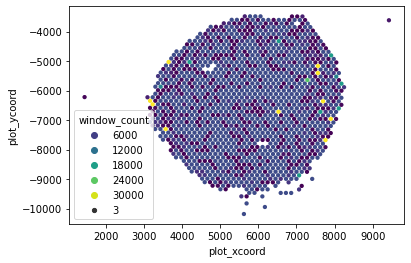

In [73]:
sns.scatterplot(data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)

sns.scatterplot(data = spliz_df2.drop_duplicates("cell_id"), x = xcol, y = ycol, hue = "window_count",size=3,linewidth=0,palette="viridis",legend=True)
plt.show()

In [59]:
spliz_df2["window_count"] = spliz_df2["window"].map(spliz_df2.groupby("window")["count"].sum())

In [60]:
spliz_df2

,cell_id,chr,pos,strand,count,sample,window,cell_count,frac_count,barcode,...,array_row,array_col,xcoord,ycoord,plot_xcoord,plot_ycoord,pixval,pixquant,num_window_spot,window_count
0,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr15,3216987,-,1,V1_Mouse_Kidney,chr15_644_minus,50086,0.000020,ATGGAGCAGGCCGTGA-1,...,36,66,5397,5774,5774,-5397,90,4,35481,35
1,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr15,3317864,-,1,V1_Mouse_Kidney,chr15_664_minus,50086,0.000020,ATGGAGCAGGCCGTGA-1,...,36,66,5397,5774,5774,-5397,90,4,35481,7113
2,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr15,3317884,-,1,V1_Mouse_Kidney,chr15_664_minus,50086,0.000020,ATGGAGCAGGCCGTGA-1,...,36,66,5397,5774,5774,-5397,90,4,35481,7113
3,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr15,3317820,-,1,V1_Mouse_Kidney,chr15_664_minus,50086,0.000020,ATGGAGCAGGCCGTGA-1,...,36,66,5397,5774,5774,-5397,90,4,35481,7113
4,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr15,3327535,-,1,V1_Mouse_Kidney,chr15_666_minus,50086,0.000020,ATGGAGCAGGCCGTGA-1,...,36,66,5397,5774,5774,-5397,90,4,35481,4901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551235,V1_Mouse_Kidney_GTGATTCGCCGCTCAA,chr7,105558670,-,1,V1_Mouse_Kidney,chr7_21112_minus,7,0.142857,GTGATTCGCCGCTCAA-1,...,48,40,6828,3980,3980,-6828,84,1,7,619
21551236,V1_Mouse_Kidney_GTGATTCGCCGCTCAA,chr11,69839447,+,1,V1_Mouse_Kidney,chr11_13968_plus,7,0.142857,GTGATTCGCCGCTCAA-1,...,48,40,6828,3980,3980,-6828,84,1,7,10561
21551237,V1_Mouse_Kidney_GTGATTCGCCGCTCAA,chr3,57834698,+,1,V1_Mouse_Kidney,chr3_11567_plus,7,0.142857,GTGATTCGCCGCTCAA-1,...,48,40,6828,3980,3980,-6828,84,1,7,2317
21551238,V1_Mouse_Kidney_GTGATTCGCCGCTCAA,chr1,90215566,+,1,V1_Mouse_Kidney,chr1_18044_plus,7,0.142857,GTGATTCGCCGCTCAA-1,...,48,40,6828,3980,3980,-6828,84,1,7,1283


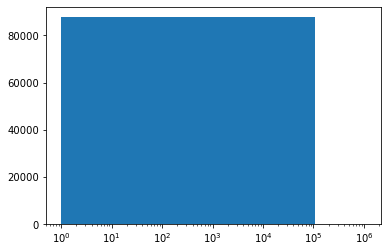

In [63]:
plt.hist(spliz_df2.drop_duplicates("window")["window_count"])
plt.xscale("log")
plt.show()

In [68]:
spliz_df2[spliz_df2["window_count"] > 100]["window"].nunique()

13505

In [67]:
spliz_df2.drop_duplicates("window")["window_count"].quantile(0.95)

830.3000000000029

In [57]:
spliz_df2.columns

Index(['cell_id', 'chr', 'pos', 'strand', 'count', 'sample', 'window',
       'cell_count', 'frac_count', 'barcode', 'in_tissue', 'array_row',
       'array_col', 'xcoord', 'ycoord', 'plot_xcoord', 'plot_ycoord', 'pixval',
       'pixquant', 'num_window_spot'],
      dtype='object')

In [38]:
spliz_df2["window"].value_counts().head(10).index

Index(['chr11_10983_plus', 'chr19_1997_plus', 'chr7_20766_minus',
       'chr7_23893_minus', 'chr9_9083_plus', 'chr6_26770_minus',
       'chr10_25710_minus', 'chr9_15696_minus', 'chr7_9092_minus',
       'chr3_20316_minus'],
      dtype='object')

In [17]:
gene_df.columns

Index(['cell_id', 'chr', 'pos', 'strand', 'count', 'sample', 'window',
       'cell_count', 'frac_count', 'barcode', 'in_tissue', 'array_row',
       'array_col', 'xcoord', 'ycoord', 'plot_xcoord', 'plot_ycoord', 'pixval',
       'pixquant', 'z_scaled_quant'],
      dtype='object')

In [14]:
spliz_df2[spliz_df2["window"] == gene]

,cell_id,chr,pos,strand,count,sample,window,cell_count,frac_count,barcode,in_tissue,array_row,array_col,xcoord,ycoord,plot_xcoord,plot_ycoord,pixval,pixquant
15701,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr11,54910062,+,1,V1_Mouse_Kidney,chr11_10983_plus,50086,0.000020,ATGGAGCAGGCCGTGA-1,1,36,66,5397,5774,5774,-5397,90,4
15702,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr11,54910112,+,2,V1_Mouse_Kidney,chr11_10983_plus,50086,0.000040,ATGGAGCAGGCCGTGA-1,1,36,66,5397,5774,5774,-5397,90,4
15703,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr11,54910128,+,3,V1_Mouse_Kidney,chr11_10983_plus,50086,0.000060,ATGGAGCAGGCCGTGA-1,1,36,66,5397,5774,5774,-5397,90,4
15704,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr11,54910118,+,3,V1_Mouse_Kidney,chr11_10983_plus,50086,0.000060,ATGGAGCAGGCCGTGA-1,1,36,66,5397,5774,5774,-5397,90,4
15705,V1_Mouse_Kidney_ATGGAGCAGGCCGTGA,chr11,54910122,+,1,V1_Mouse_Kidney,chr11_10983_plus,50086,0.000020,ATGGAGCAGGCCGTGA-1,1,36,66,5397,5774,5774,-5397,90,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551140,V1_Mouse_Kidney_GTTCGTCTGGGTCCCT,chr11,54910227,+,1,V1_Mouse_Kidney,chr11_10983_plus,118,0.008475,GTTCGTCTGGGTCCCT-1,1,21,119,3614,9428,9428,-3614,149,9
21551141,V1_Mouse_Kidney_GTTCGTCTGGGTCCCT,chr11,54910255,+,1,V1_Mouse_Kidney,chr11_10983_plus,118,0.008475,GTTCGTCTGGGTCCCT-1,1,21,119,3614,9428,9428,-3614,149,9
21551213,V1_Mouse_Kidney_AGAAGAGCGCCGTTCC,chr11,54910096,+,1,V1_Mouse_Kidney,chr11_10983_plus,34,0.029412,AGAAGAGCGCCGTTCC-1,1,38,88,5642,7287,7287,-5642,91,5
21551214,V1_Mouse_Kidney_AGAAGAGCGCCGTTCC,chr11,54910156,+,1,V1_Mouse_Kidney,chr11_10983_plus,34,0.029412,AGAAGAGCGCCGTTCC-1,1,38,88,5642,7287,7287,-5642,91,5


In [44]:
row

method                                                       visium
spliz_vals        /oak/stanford/groups/horence/JuliaO/nf-spliz-o...
readzs_vals       /oak/stanford/groups/horence/JuliaO/data/visiu...
ge_vals           /scratch/groups/horence/JuliaO/single_cell/spa...
tissue                                                       Kidney
image             /oak/stanford/groups/horence/JuliaO/data/visiu...
metadata          /scratch/groups/horence/JuliaO/single_cell/spa...
pixcorr_ge        /scratch/groups/horence/JuliaO/single_cell/spa...
pixcorr_readzs    /scratch/groups/horence/JuliaO/single_cell/spa...
pixcorr_spliz     /scratch/groups/horence/JuliaO/single_cell/spa...
Name: V1_Mouse_Kidney, dtype: object

In [30]:
srow

col           z_scaled
genecol         window
cellid         cell_id
valname    readzs_vals
Name: ReadZS, dtype: object

,window,num_spots,corr_pixval,pval_pixval,pval_pixval_adj,gene
0,chr11_10983_plus,1435,-0.237195,8.413271e-20,1.093809e-15,Gpx3
1,chr4_23431_minus,1423,0.225282,7.863158e-18,5.111446e-14,"Rps8,Gm22980,Snord38a"
2,chr6_26770_minus,1434,0.213034,3.521699e-16,1.526187e-12,Kap
3,chr4_23856_minus,1316,0.209497,1.615914e-14,5.252126e-11,Ybx1
4,chr7_8918_plus,1433,-0.188366,6.535575e-13,1.699380e-09,Napsa
...,...,...,...,...,...,...
12996,chr11_21683_plus,126,0.000053,9.995336e-01,9.998413e-01,Apoh
12997,chr11_24158_plus,1064,-0.000012,9.996864e-01,9.999065e-01,Gps1
12998,chr7_28282_minus,461,0.000014,9.997527e-01,9.999065e-01,Pddc1
12999,chr5_9662_plus,394,0.000008,9.998813e-01,9.999582e-01,Slit2


100%|██████████| 279468/279468 [00:28<00:00, 9980.82it/s] 


In [12]:

corr

,window,num_spots,corr_pixval,pval_pixval,pval_pixval_adj,gene
0,chr11_10983_plus,1435,-0.237195,8.413271e-20,1.093809e-15,Gpx3
1,chr4_23431_minus,1423,0.225282,7.863158e-18,5.111446e-14,"Rps8,Gm22980,Snord38a"
2,chr6_26770_minus,1434,0.213034,3.521699e-16,1.526187e-12,Kap
3,chr4_23856_minus,1316,0.209497,1.615914e-14,5.252126e-11,Ybx1
4,chr7_8918_plus,1433,-0.188366,6.535575e-13,1.699380e-09,Napsa
...,...,...,...,...,...,...
12996,chr11_21683_plus,126,0.000053,9.995336e-01,9.998413e-01,Apoh
12997,chr11_24158_plus,1064,-0.000012,9.996864e-01,9.999065e-01,Gps1
12998,chr7_28282_minus,461,0.000014,9.997527e-01,9.999065e-01,Pddc1
12999,chr5_9662_plus,394,0.000008,9.998813e-01,9.999582e-01,Slit2


In [48]:
corr[corr["gene"].str.contains("Rps24")]

,window,num_spots,corr_pixval,pval_pixval,pval_pixval_adj,gene
1845,chrX_15840_plus,296,0.103254,0.076118,0.536197,Rps24-ps3
2256,chr14_4900_plus,246,-0.104505,0.102001,0.587554,Rps24
10418,chr14_4899_plus,1378,0.007852,0.770877,0.961658,Rps24


In [59]:
corr[corr["pval_pixval_adj"] < 0.05]

,window,num_spots,corr_pixval,pval_pixval,pval_pixval_adj,gene
0,chr4_23431_minus,2659,0.255791,5.470902e-41,9.656142e-37,"Rps8,Gm22980,Snord38a"
1,chr2_34870_plus,2670,-0.246316,3.414789e-38,3.013552e-34,Gnas
2,chr12_14443_minus,2620,0.239530,1.663128e-35,9.784739e-32,Rtn1
3,chr3_18123_plus,1615,-0.271992,8.703711e-29,3.840512e-25,"S100a5,S100a6"
4,chr2_5643_plus,2442,-0.221739,1.397844e-28,4.934391e-25,Olfm1
...,...,...,...,...,...,...
602,chr15_15771_plus,739,-0.115516,1.658191e-03,4.853578e-02,Cdc42ep1
603,chr12_2644_minus,2082,0.068883,1.661278e-03,4.854561e-02,Ddx1
604,chr10_1526_plus,2083,-0.068812,1.675743e-03,4.888737e-02,Lrp11
605,chr13_6826_minus,1858,0.072832,1.681112e-03,4.896309e-02,Tubb2b
